# **Environment Setup**

In [1]:
# datasets to be used: "diabetes.csv"
# objective: predict whether patients have diabetes or not, based on bloodpressure, glucose, etc.
# upload datasets to a folder in Google Drive, e.g., My Drive/Colab Data
# connect to Google Drive, path to datasets is "/content/drive/My Drive/Colab Data/..."
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn data and model packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # will be covered next lecture

# sklearn model metrics (evaluation) packages
from sklearn.metrics import *

In [3]:
# load the data and review
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 rows and 9 columns. The first 8 columns represent the features (X) and the last column represent the target/label (y). 

In [6]:
# Separate data into X (input/predictors) and y (target)
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

## Train/Test Split

In [7]:
# Use train/test split function
# stratify option ensures the training and testing data have the same
# proportion of positive and negative outcomes (0's and 1's for vector y)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2, stratify=y)

## Prediction model (skip details on how it works for this lecture)

In [8]:
# kNN model (details covered next lecture)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# extract the predictions of the model using the X_test set
y_pred = knn.predict(X_test)

# extract the probabilities (of belonging to class "1")
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [9]:
# combine true and predicted values in a Dataframe
y_df = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_proba)], axis=1)
y_df.columns = ["true","predicted", "probability"]
y_df

,true,predicted,probability
0,0,1,0.75
1,0,0,0.00
2,0,0,0.25
3,1,1,0.75
4,0,0,0.00
...,...,...,...
226,1,1,0.75
227,1,0,0.00
228,0,0,0.25
229,0,0,0.25


## Confusion Matrix


In [10]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[137,  13],
       [ 48,  33]])

In [11]:
# alternative: pandas has a function called crosstab
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,137,13,150
1,48,33,81
All,185,46,231


* True negative (tn) = 137
* False positive (fp) = 13
* False negative (fn) = 48
* True positive (tp) = 33
* Total = 231


**Classification Report**

* Accuracy = (tp+tn) / total
* Precision = tp / (tp + fp), intuitively the ability of the classifier not to label as positive a sample that is negative.
* Recall (Sensitivity) = tp / (tp + fn), intuitively the ability of the classifier to find all the positive samples.

In [12]:
# Accuracy score
m1 = accuracy_score(y_test,y_pred).round(2)

# Precision score
m2 = precision_score(y_test,y_pred).round(2)

# Recall score
m3 = recall_score(y_test, y_pred).round(2)

print ("accuracy:", m1, "precision:", m2, "recall:", m3)

accuracy: 0.74 precision: 0.72 recall: 0.41


In [13]:
# Shortcut: summary using classification_report function
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       150
           1       0.72      0.41      0.52        81

    accuracy                           0.74       231
   macro avg       0.73      0.66      0.67       231
weighted avg       0.73      0.74      0.71       231



## ROC (Reciever Operating Charecteristic) curve

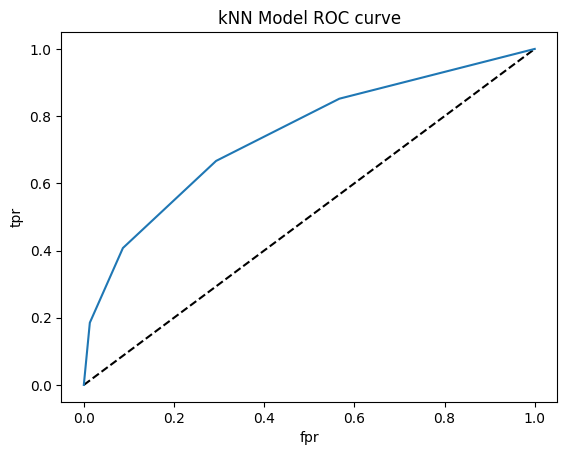

In [14]:
# extract roc curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot roc curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('kNN Model ROC curve')
plt.show()

In [15]:
#Area under ROC curve (1 is best)
roc_auc_score(y_test,y_pred_proba)

0.7427160493827161

## Cross-validation

In [15]:
# Alternative method with cross-validation
# cross_val_score() outputs the accuracy of the model

# options to set:
# shuffle: randomly shuffle the data prior to splitting
# random_state: allows the shuffling to be hard-coded  
fold_options = KFold(n_splits=5, shuffle=True)

# obtain the scores, such as accuracy, f1 score etc.
# types of "scoring" includes "accuracy", "f1", "precision", etc. listed here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
score_type = 'accuracy'

# Syntax: cross_val_score(my_model, X_data, y_data, options)
cv_scores = cross_val_score(knn, X, y, scoring = score_type, cv=fold_options)

print(score_type, "scores for each subset:", cv_scores.round(3))
print("average", score_type, np.mean(cv_scores).round(3))

accuracy scores for each subset: [0.753 0.74  0.727 0.699 0.719]
average accuracy 0.728
